## Grover's algorithm for 2 qubits

Grover search for state |11>

Import required packages and initialize the least busy backend

In [1]:
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit
from qiskit.providers.ibmq import least_busy
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

provider = IBMQ.load_account()
provider = IBMQ.get_provider("ibm-q")
device = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 3 and 
                                   not x.configuration().simulator and x.status().operational==True))

Implementing the circuit

In [2]:
n = 2
grover_circuit = QuantumCircuit(n)

def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

# Oracle
grover_circuit = initialize_s(grover_circuit, [0,1])
grover_circuit.cz(0,1)
# Diffusion operator (U_s)
grover_circuit.h([0,1])
grover_circuit.z([0,1])
grover_circuit.cz(0,1)
grover_circuit.h([0,1])
grover_circuit.draw()

grover_circuit.measure_all()


Simulating the circuit

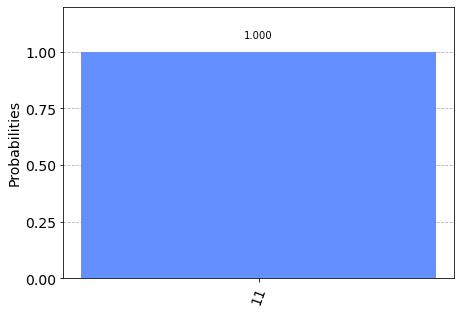

In [3]:
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(grover_circuit)
result = aer_sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

Processing of the circuit on quantum hardware

Job Status: job has successfully run


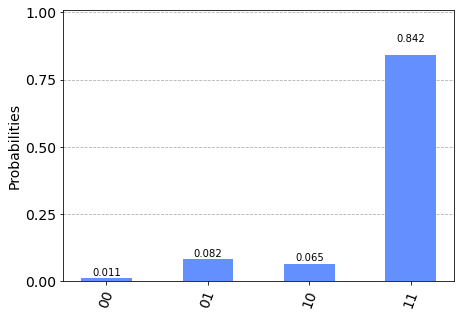

In [4]:
# Run on the least busy backend
transpiled_grover_circuit = transpile(grover_circuit, device, optimization_level=3)
job = device.run(transpiled_grover_circuit)
job_monitor(job, interval=2)

results = job.result()
answer = results.get_counts(grover_circuit)
plot_histogram(answer)

As we can see running the circuit on a real quantum computer doesn't give perfect results, as expected, but it is mostly correct (84%).